In [1]:
import pandas as pd

In [2]:
input_df = pd.read_csv("../00_Data/cleaned_data/cleaned_merged_data.csv")
# Drop the null columns where all values are null
input_df = input_df.dropna(axis='columns', how='all')
# Drop the null rows
input_df = input_df.dropna()
df = input_df.copy()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 220423 entries, 0 to 220422
Columns: 240 entries, fips_block_group to site_text
dtypes: float64(226), int64(1), object(13)
memory usage: 405.3+ MB


In [3]:
df= df[df['has_superfund'] != 0]
df.head()

,fips_block_group,state,state_name,county,county_name,tract,block_group,flag,land_area,aian_land,...,federal_register_url,geocode_source,latitude,longitude,site_epa_id,site_name,site_narrative_url,site_progress_url,site_score,site_text
264,10150015003,1.0,Alabama,15.0,Calhoun County,1500.0,3.0,0.0,5.624,0.0,...,https://semspub.epa.gov/src/document/11/189630,full_address,33.623214,-85.923679,AL3210020027,Anniston Army Depot (Southeast Industrial Area),https://semspub.epa.gov/src/document/04/11121396,https://cumulis.epa.gov/supercpad/cursites/csi...,51.91,NPL SITE LISTING NARRATIVE\n\n\nNPL Site Narra...
1070,10670305003,1.0,Alabama,67.0,Henry County,30500.0,3.0,0.0,3.102,0.0,...,http://www.gpo.gov/fdsys/pkg/FR-1999-05-10/pdf...,full_address,31.351466,-85.342147,ALD981868466,American Brass,https://semspub.epa.gov/src/document/04/11121379,https://cumulis.epa.gov/supercpad/cursites/csi...,55.61,NPL SITE LISTING NARRATIVE\n\n\nNPL Site Narra...
1458,10730110012,1.0,Alabama,73.0,Jefferson County,11001.0,2.0,0.0,3.802,0.0,...,https://semspub.epa.gov/src/document/11/189628,full_address,33.538652,-86.533784,ALD041906173,Interstate Lead Co. (ILCO),https://semspub.epa.gov/src/document/04/11121412,https://cumulis.epa.gov/supercpad/cursites/csi...,42.86,NPL SITE LISTING NARRATIVE\n\n\nNPL Site Narra...
2158,10890111001,1.0,Alabama,89.0,Madison County,11100.0,1.0,0.0,60.459,0.0,...,https://semspub.epa.gov/src/document/11/189620,zip_only,34.630000,-86.650000,ALD983166299,Triana/Tennessee River,https://semspub.epa.gov/src/document/04/11121406,https://cumulis.epa.gov/supercpad/cursites/csi...,61.42,NPL SITE LISTING NARRATIVE\n\n\nNPL Site Narra...
2159,10890111001,1.0,Alabama,89.0,Madison County,11100.0,1.0,0.0,60.459,0.0,...,https://semspub.epa.gov/src/document/11/189638,city_state_zip,34.672990,-86.651033,AL7210020742,Redstone Arsenal (USARMY/NASA),https://semspub.epa.gov/src/document/04/11121354,https://cumulis.epa.gov/supercpad/cursites/csi...,50.00,NPL SITE LISTING NARRATIVE\n\n\nNPL Site Narra...


In [4]:
selected_features = df.loc[:, df.columns != 'site_score']
selected_features.head()

,fips_block_group,state,state_name,county,county_name,tract,block_group,flag,land_area,aian_land,...,federal_facility_ind,federal_register_url,geocode_source,latitude,longitude,site_epa_id,site_name,site_narrative_url,site_progress_url,site_text
264,10150015003,1.0,Alabama,15.0,Calhoun County,1500.0,3.0,0.0,5.624,0.0,...,Yes,https://semspub.epa.gov/src/document/11/189630,full_address,33.623214,-85.923679,AL3210020027,Anniston Army Depot (Southeast Industrial Area),https://semspub.epa.gov/src/document/04/11121396,https://cumulis.epa.gov/supercpad/cursites/csi...,NPL SITE LISTING NARRATIVE\n\n\nNPL Site Narra...
1070,10670305003,1.0,Alabama,67.0,Henry County,30500.0,3.0,0.0,3.102,0.0,...,No,http://www.gpo.gov/fdsys/pkg/FR-1999-05-10/pdf...,full_address,31.351466,-85.342147,ALD981868466,American Brass,https://semspub.epa.gov/src/document/04/11121379,https://cumulis.epa.gov/supercpad/cursites/csi...,NPL SITE LISTING NARRATIVE\n\n\nNPL Site Narra...
1458,10730110012,1.0,Alabama,73.0,Jefferson County,11001.0,2.0,0.0,3.802,0.0,...,No,https://semspub.epa.gov/src/document/11/189628,full_address,33.538652,-86.533784,ALD041906173,Interstate Lead Co. (ILCO),https://semspub.epa.gov/src/document/04/11121412,https://cumulis.epa.gov/supercpad/cursites/csi...,NPL SITE LISTING NARRATIVE\n\n\nNPL Site Narra...
2158,10890111001,1.0,Alabama,89.0,Madison County,11100.0,1.0,0.0,60.459,0.0,...,No,https://semspub.epa.gov/src/document/11/189620,zip_only,34.630000,-86.650000,ALD983166299,Triana/Tennessee River,https://semspub.epa.gov/src/document/04/11121406,https://cumulis.epa.gov/supercpad/cursites/csi...,NPL SITE LISTING NARRATIVE\n\n\nNPL Site Narra...
2159,10890111001,1.0,Alabama,89.0,Madison County,11100.0,1.0,0.0,60.459,0.0,...,Yes,https://semspub.epa.gov/src/document/11/189638,city_state_zip,34.672990,-86.651033,AL7210020742,Redstone Arsenal (USARMY/NASA),https://semspub.epa.gov/src/document/04/11121354,https://cumulis.epa.gov/supercpad/cursites/csi...,NPL SITE LISTING NARRATIVE\n\n\nNPL Site Narra...


In [5]:
selected_features = selected_features.loc[:, selected_features.columns != 'latitude'] 

In [6]:
selected_features = selected_features.loc[:, selected_features.columns != 'longitude'] 

In [7]:
selected_features = selected_features.loc[:, selected_features.columns != 'fips_full'] 

In [8]:
selected_features = selected_features.loc[:, selected_features.columns != 'has_superfund'] 

In [9]:
selected_features = selected_features.loc[:, selected_features.columns != 'fips_block_group']

In [10]:
cols_to_remove = []

for col in selected_features.columns:
    try:
        _ = selected_features[col].astype(float)
    except ValueError:
        print('Couldn\'t covert %s to float' % col)
        cols_to_remove.append(col)
        pass

# keep only the columns in df that do not contain string
selected_features = selected_features[[col for col in selected_features.columns if col not in cols_to_remove]]

Couldn't covert state_name to float
Couldn't covert county_name to float
Couldn't covert address to float
Couldn't covert city to float
Couldn't covert date_added to float
Couldn't covert federal_facility_ind to float
Couldn't covert federal_register_url to float
Couldn't covert geocode_source to float
Couldn't covert site_epa_id to float
Couldn't covert site_name to float
Couldn't covert site_narrative_url to float
Couldn't covert site_progress_url to float
Couldn't covert site_text to float


In [11]:
X = selected_features
y = df[['site_score']]
X.shape, y.shape

((1340, 221), (1340, 1))

In [12]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [13]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [14]:
model.fit(X_train, y_train)
training_score = model.score(X_train, y_train)
testing_score = model.score(X_test, y_test)

### END SOLUTION 

print(f"Training Score: {training_score}")
print(f"Testing Score: {testing_score}")

Training Score: 0.1893779103455725
Testing Score: -1003420.4930602045


Text(0.5, 1.0, 'Residual Plot')

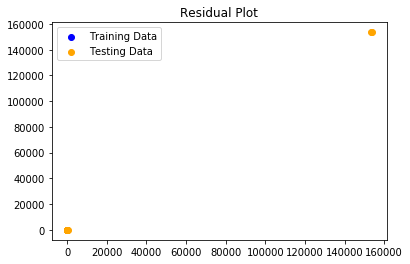

In [15]:
import matplotlib.pyplot as plt
plt.scatter(model.predict(X_train), model.predict(X_train) - y_train, c="blue", label="Training Data")
plt.scatter(model.predict(X_test), model.predict(X_test) - y_test, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y.min(), xmax=y.max())
plt.title("Residual Plot")

In [16]:
coef = model.coef_[0]

col_names = X.columns
feat_lst = list(zip(col_names, coef))
summary_df = pd.DataFrame({'feature_name': col_names, 'correl': coef})
summary_df.sort_values(['correl'], ascending=False)

,feature_name,correl
197,pct_vacant_units_acs_09_13,1535.253040
195,pct_tot_occp_units_acs_09_13,1535.035639
175,pct_mrdcple_hhd_cen_2010,1101.618842
177,pct_not_mrdcple_hhd_cen_2010,1101.323604
128,pct_pop_under_5_acs_09_13,696.805963
...,...,...
173,pct_rel_family_hhds_cen_2010,-716.966517
198,pct_renter_occp_hu_cen_2010,-912.286101
200,pct_owner_occp_hu_cen_2010,-912.330813
201,pct_owner_occp_hu_acs_09_13,-1320.501909


In [17]:
import pandas as pd
import numpy as np
from sklearn import datasets, linear_model
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from scipy import stats

X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:             site_score   R-squared:                       0.141
Model:                            OLS   Adj. R-squared:                 -0.010
Method:                 Least Squares   F-statistic:                    0.9313
Date:                Sat, 10 Oct 2020   Prob (F-statistic):              0.734
Time:                        19:42:52   Log-Likelihood:                -5103.5
No. Observations:                1340   AIC:                         1.061e+04
Df Residuals:                    1139   BIC:                         1.165e+04
Df Model:                         200                                         
Covariance Type:            nonrobust                                         
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
const   

In [18]:
df2 = pd.DataFrame(model.predict(X))

print(df2)

              0
0     40.759765
1     48.072280
2     36.598767
3     52.102086
4     52.102086
...         ...
1335  49.260807
1336  47.392338
1337  47.730225
1338  46.202538
1339  27.198416

[1340 rows x 1 columns]


In [19]:
df2.head()

,0
0,40.759765
1,48.072280
2,36.598767
3,52.102086
4,52.102086


## Save the Model

In [28]:
import joblib
filename = 'superfund_score_model.sav'
joblib.dump(model, filename)

['superfund_score_model.sav']

### Generate Predictions for Full Dataset

In [20]:
# bring in the results csv
export_data_csv = "../00_Data/cleaned_data/data_with_site_predictions.csv"
data_df = pd.read_csv(export_data_csv)
# create a df for making predictions,
feature_df = data_df.copy()
# create a list of columns to exclude from the predictions
exclusion_list = ['fips_block_group',
            'state_name',
            'county_name',
            'has_superfund',
            'fips_full',
            'address',
            'city',
            'date_added',
            'federal_facility_ind',
            'federal_register_url',
            'geocode_source',
            'latitude',
            'longitude',
            'site_epa_id',
            'site_name',
            'site_narrative_url',
            'site_progress_url',
            'site_score',
            'site_text',
            'site_probability',
            'score_prediction'
            ]
# and reduce the df to the relevant columns
feature_df.drop(feature_df[exclusion_list],axis=1,inplace=True)
feature_names = feature_df.columns

feature_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 220423 entries, 0 to 220422
Columns: 221 entries, state to pct_bilq_mailout_count_cen_2010
dtypes: float64(221)
memory usage: 371.7 MB


In [21]:
# compare to training data
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1340 entries, 264 to 220349
Columns: 221 entries, state to pct_bilq_mailout_count_cen_2010
dtypes: float64(221)
memory usage: 2.3 MB


In [22]:
# feed the dataset to the model
# generate predictions using the final selected model
site_score_prediction = model.predict(feature_df)

In [31]:
# write list to the list vault
score_model_features = feature_df.columns.values.tolist()
f = open("feature_list_vault.py", "a")
hasTextBeenWritten = False
f.write("score_model_features = [ \n")
for i in score_model_features: 
    if hasTextBeenWritten:
        f.write(",\n")
    f.write(f"'{i}'")
    hasTextBeenWritten = True
f.write("\n]\n")
f.close()

In [23]:
site_score_prediction

array([[39.93269534],
       [43.74359621],
       [39.08546441],
       ...,
       [53.4566135 ],
       [30.96595254],
       [57.88420956]])

In [24]:
export_df = data_df.copy()
export_df['score_prediction'] = site_score_prediction

In [25]:
export_df.head()

,fips_block_group,state,state_name,county,county_name,tract,block_group,flag,land_area,aian_land,...,latitude,longitude,site_epa_id,site_name,site_narrative_url,site_progress_url,site_score,site_text,site_probability,score_prediction
0,10010201001,1.0,Alabama,1.0,Autauga County,20100.0,1.0,0.0,1.638,0.0,...,0.0,0.0,0,0,0,0,0.0,0,0.000,39.932695
1,10010201002,1.0,Alabama,1.0,Autauga County,20100.0,2.0,0.0,2.150,0.0,...,0.0,0.0,0,0,0,0,0.0,0,0.000,43.743596
2,10010202001,1.0,Alabama,1.0,Autauga County,20200.0,1.0,0.0,0.795,0.0,...,0.0,0.0,0,0,0,0,0.0,0,0.005,39.085464
3,10010202002,1.0,Alabama,1.0,Autauga County,20200.0,2.0,0.0,0.495,0.0,...,0.0,0.0,0,0,0,0,0.0,0,0.005,35.448064
4,10010203001,1.0,Alabama,1.0,Autauga County,20300.0,1.0,0.0,1.493,0.0,...,0.0,0.0,0,0,0,0,0.0,0,0.020,41.466316


### Export to csv

In [26]:
export_data_csv = "../00_Data/cleaned_data/data_with_all_predictions.csv"
export_df.to_csv(export_data_csv, index = False)